# As a public health informatics scientists, I am preparing this report to create 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load datasets
dataset2018 = Path('.', 'Data', 'ambulance2018.csv')
dataset2019 = Path('.', 'Data', 'ambulance2019.csv')

# Read datasets
data_2018 = pd.read_csv(dataset2018)
data_2019 = pd.read_csv(dataset2019)

# Function to summarize data
def summarize_data(data, year):
    unique_areas = data['UCL Name'].nunique()
    total_code_types = data['Final Dispatch Code'].nunique()
    avg_response_time = data['AVG RT - Seconds'].mean(skipna=True)
    avg_calls = data['Total Number'].mean(skipna=True)
    
    return {
        "year": year,
        "unique_areas": unique_areas,
        "total_code_types": total_code_types,
        "avg_response_time": avg_response_time,
        "avg_calls": avg_calls,
    }

# Summarize data for both years
summary_2018 = summarize_data(data_2018, 2018)
summary_2019 = summarize_data(data_2019, 2019)

# Prepare data for plotting
years = [summary_2018["year"], summary_2019["year"]]
unique_areas = [summary_2018["unique_areas"], summary_2019["unique_areas"]]
total_code_types = [summary_2018["total_code_types"], summary_2019["total_code_types"]]
avg_response_time = [summary_2018["avg_response_time"], summary_2019["avg_response_time"]]
avg_calls = [summary_2018["avg_calls"], summary_2019["avg_calls"]]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot total unique areas
axs[0, 0].bar(years, unique_areas, color='#FF5733')
axs[0, 0].set_title('Total Unique Areas')
axs[0, 0].set_ylabel('Number of Unique Areas')
axs[0, 0].set_ylim(0, max(unique_areas) + 5)

# Plot total code types
axs[0, 1].bar(years, total_code_types, color='#FF5733')
axs[0, 1].set_title('Total Code Types')
axs[0, 1].set_ylabel('Number of Code Types')
axs[0, 1].set_ylim(0, max(total_code_types) + 1)

# Plot average response time
axs[1, 0].bar(years, avg_response_time, color='#FF5733')
axs[1, 0].set_title('Average Response Time (Seconds)')
axs[1, 0].set_ylabel('Average Response Time (s)')
axs[1, 0].set_ylim(0, max(avg_response_time) + 50)

# Plot average number of calls
axs[1, 1].bar(years, avg_calls, color='#FF5733')
axs[1, 1].set_title('Average Number of Calls')
axs[1, 1].set_ylabel('Average Number of Calls')
axs[1, 1].set_ylim(0, max(avg_calls) + 500)

# Adjust layout
plt.tight_layout()
plt.show()

TypeError: can only concatenate str (not "int") to str

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# File paths for 2018 and 2019 datasets
dataset2018 = Path('.', 'Data', 'ambulance2018.csv')
dataset2019 = Path('.', 'Data', 'ambulance2019.csv')

# Read datasets
dataset = pd.read_csv(dataset2018)
dataset2 = pd.read_csv(dataset2019)

# Display first few rows of the datasets
print("2018 Data")
print(dataset.head())

print("\n2019 Data")
print(dataset2.head())

2018 Data
                          UCL Name Final Dispatch Code %<=15mins  \
0  Albury - Wodonga (Wodonga Part)              Code 1    91.35%   
1                    Bacchus Marsh              Code 1    79.85%   
2                       Bairnsdale              Code 1    85.61%   
3                         Ballarat              Code 1    89.32%   
4                          Benalla              Code 1    84.08%   

  AVG RT - Seconds Total Number  
0              602         1735  
1              693          784  
2              668          966  
3              627         5272  
4              682          534  

2019 Data
                          UCL Name Final Dispatch Code %<=15mins  \
0  Albury - Wodonga (Wodonga Part)              Code 1     90.9%   
1                    Bacchus Marsh              Code 1     83.4%   
2                       Bairnsdale              Code 1     84.1%   
3                         Ballarat              Code 1     91.2%   
4                         

In [11]:
# Analysis: Compare average response time between Code 1 and Code 2 for 2018
dataset_code1 = dataset[dataset['Final Dispatch Code'] == 'Code 1']
dataset_code2 = dataset2[dataset2['Final Dispatch Code'] == 'Code 2']

# Merging both datasets for comparison
merged_data = pd.merge(dataset_code1[['UCL Name', 'AVG RT - Seconds', 'Total Number']],
                       dataset_code2[['UCL Name', 'AVG RT - Seconds', 'Total Number']],
                       on='UCL Name', suffixes=('_Code1', '_Code2'))


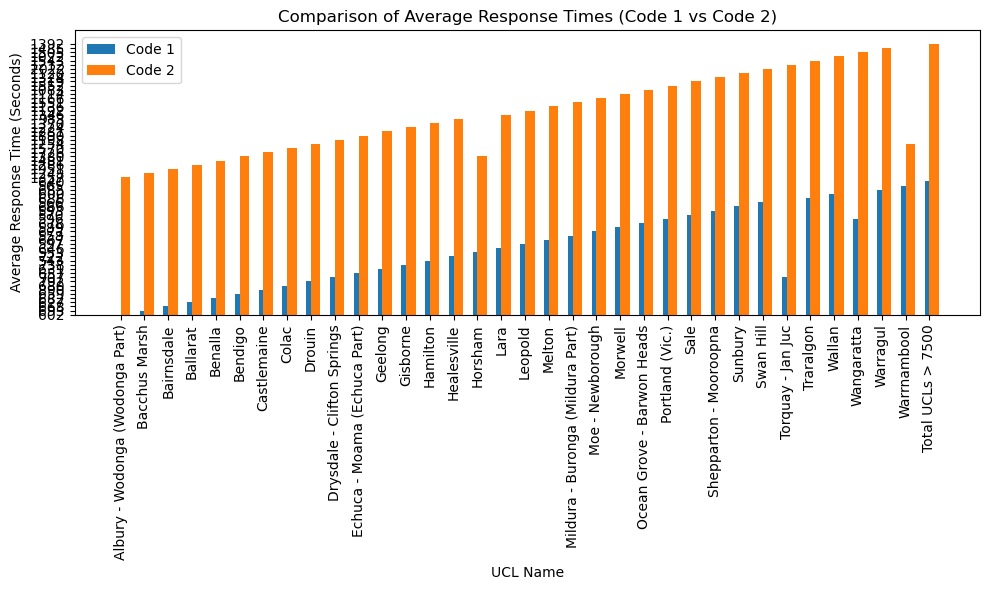

In [12]:
# Plotting
plt.figure(figsize=(10, 6))

# Bar chart for Average Response Times
plt.bar(merged_data['UCL Name'], merged_data['AVG RT - Seconds_Code1'], width=0.4, label='Code 1', align='center')
plt.bar(merged_data['UCL Name'], merged_data['AVG RT - Seconds_Code2'], width=0.4, label='Code 2', align='edge')

plt.xlabel('UCL Name')
plt.ylabel('Average Response Time (Seconds)')
plt.title('Comparison of Average Response Times (Code 1 vs Code 2)')
plt.xticks(rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from pathlib import Path

# Impor the OpenWeatherMap API key
#from api_keys import api_keys

In [22]:
dataset2018= Path('.','Data','ambulance2018.csv')
dataset2019= Path('.','Data','ambulance2019.csv')
dataset= pd.read_csv(dataset2018)
dataset2=pd.read_csv(dataset2019)

dataset.head()

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
0,Albury - Wodonga (Wodonga Part),Code 1,91.35%,602,1735
1,Bacchus Marsh,Code 1,79.85%,693,784
2,Bairnsdale,Code 1,85.61%,668,966
3,Ballarat,Code 1,89.32%,627,5272
4,Benalla,Code 1,84.08%,682,534


In [21]:
dataset2.head()

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
0,Albury - Wodonga (Wodonga Part),Code 1,90.9%,604,"2,050"
1,Bacchus Marsh,Code 1,83.4%,643,835
2,Bairnsdale,Code 1,84.1%,654,"1,021"
3,Ballarat,Code 1,91.2%,604,"5,785"
4,Benalla,Code 1,76.4%,752,592


In [28]:
code1 = dataset[dataset['Final Dispatch Code'] == 'Code 1']
code1.head()

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
0,Albury - Wodonga (Wodonga Part),Code 1,91.35%,602,1735
1,Bacchus Marsh,Code 1,79.85%,693,784
2,Bairnsdale,Code 1,85.61%,668,966
3,Ballarat,Code 1,89.32%,627,5272
4,Benalla,Code 1,84.08%,682,534


In [30]:
code2 = dataset[dataset['Final Dispatch Code'] == 'Code 2']
code2.head()

,UCL Name,Final Dispatch Code,%<=15mins,AVG RT - Seconds,Total Number
42,Albury - Wodonga (Wodonga Part),Code 2,NaN,1325,1437
43,Bacchus Marsh,Code 2,NaN,1415,903
44,Bairnsdale,Code 2,NaN,1853,1007
45,Ballarat,Code 2,NaN,1269,3996
46,Benalla,Code 2,NaN,1438,639


TypeError: unhashable type: 'numpy.ndarray'

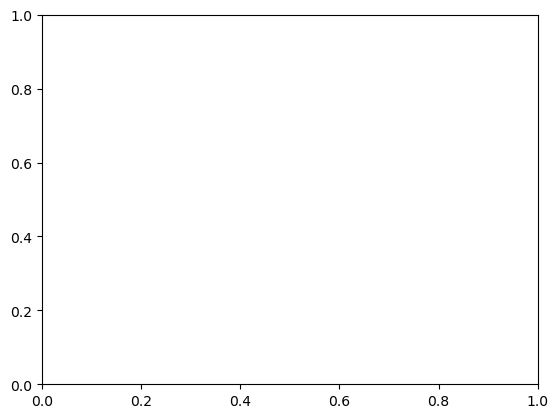

In [33]:
plt.plot(code1,code2)
plt.show()